# 統計政大近5年，（大學部）各系轉入、轉出人數趨勢變化

1. 將pdf轉成csv
2. 載入近五年轉系名單，並append進transfer
3. 創建一個新dataframe: "transfer"
4. 根據transfer創建另外兩個dataframes: "transfer_in"：根據轉入科系排序；"transfer_out"：根據轉出科系排序（兩者皆使用get_group函式）
4. 

##  transfer_in, transfer_out尺寸：n\*2（col0：index；col1：轉入/轉出系級；row：n人）


groupby：根據科系名稱分成好幾個（32個）dataframes

value_counts：數col1各個科系的人數

```
import pandas as pd
 
 
transfer = pd.read_csv('轉系名單.csv')
 
transfer_in = transfer.groupby(['轉入系級'])
transfer_out = transfer.groupby(['轉出系級'])
 
print(transfer_in['轉入系級'].value_counts())
print(transfer_out['轉出系級'].value_counts())



```

---

```
def sort_transfer(transfer): #（單一年）
    transfer_in = transfer.groupby(['轉入系級'])
    transfer_out = transfer.groupby(['轉出系級'])
    return transfer_in, transfer_out

def sort_all_transfer(*transfers): #（所有年打包成tuple）
    all_transfer = []
    for transfer in transfers:
        all_transfer.append(transfer)
    return sort_transfer(all_transfer)
    
```


任務：
1. 各系五年總和轉入/轉出人數（長條圖，共一張）
2. 各系五年分別轉入/轉出的人數趨勢變化（折線圖，共32張）
3. 將2.畫在同一張圖

In [1]:
def f(x):
    return x+1, x+2

In [2]:
# multiple return test
x = 0
y = f(x)
print(y) # a tuple
y, z = f(x)
print(y, z) # two elements

(1, 2)
1 2


In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preprocessing

只留轉入系級與轉出系級

In [4]:
import tabula

In [5]:
# turn pdf to csv
tabula.convert_into('transfer_110.pdf', 'transfer_110.csv', output_format = 'csv', pages='all')

In [6]:
# set columns & create dataframe
name = ['序號', '學號', '姓名', '轉入系級', '轉出系級']
transfer_110 = pd.DataFrame(columns=name)
transfer_110 = pd.read_csv('transfer_110.csv')
print(transfer_110)

     序號         學號   姓名          轉入系級            轉出系級
0     1  107207318  廖家棟       教育學系四年級  地政學系土地資源規劃組三年級
1     2  107207332  楊詠淇       教育學系三年級  地政學系土地資源規劃組二年級
2     3  107508018  周曰鳳       教育學系四年級      土耳其語文學系三年級
3     4  107701022  陶英明       教育學系四年級        應用數學系三年級
4     5  107701023  徐靖凡       教育學系三年級        應用數學系三年級
..   ..        ...  ...           ...             ...
220  序號         學號   姓名          轉入系級            轉出系級
221   1  109102027  張芫禎      資訊科學系二年級         教育學系一年級
222   2  109208064   俞懿      資訊科學系二年級       經濟學系一年級乙班
223  序號         學號   姓名          轉入系級            轉出系級
224   1  109504002  蔡睿芸  創新國際學院學士班二年級    斯拉夫語文學系一年級乙班

[225 rows x 5 columns]


In [7]:
# remove redundant columns
transfer_110.drop(['序號', '學號', '姓名'], axis=1, inplace=True)

In [8]:
transfer_110

,轉入系級,轉出系級
0,教育學系四年級,地政學系土地資源規劃組三年級
1,教育學系三年級,地政學系土地資源規劃組二年級
2,教育學系四年級,土耳其語文學系三年級
3,教育學系四年級,應用數學系三年級
4,教育學系三年級,應用數學系三年級
...,...,...
220,轉入系級,轉出系級
221,資訊科學系二年級,教育學系一年級
222,資訊科學系二年級,經濟學系一年級乙班
223,轉入系級,轉出系級


In [9]:
print(transfer_110.loc[transfer_110['轉入系級'] != '轉入系級'])

             轉入系級            轉出系級
0         教育學系四年級  地政學系土地資源規劃組三年級
1         教育學系三年級  地政學系土地資源規劃組二年級
2         教育學系四年級      土耳其語文學系三年級
3         教育學系四年級        應用數學系三年級
4         教育學系三年級        應用數學系三年級
..            ...             ...
218       心理學系二年級       韓國語文學系一年級
219       心理學系二年級  歐洲語文學系一年級西班牙文組
221      資訊科學系二年級         教育學系一年級
222      資訊科學系二年級       經濟學系一年級乙班
224  創新國際學院學士班二年級    斯拉夫語文學系一年級乙班

[192 rows x 2 columns]


In [10]:
# remove redundant rows
transfer_110 = transfer_110.loc[transfer_110['轉入系級'] != '轉入系級']

In [11]:
# reindex then index is continuous
transfer_110 = transfer_110.reindex(columns=['轉入系級', '轉出系級'])

In [12]:
transfer_110

,轉入系級,轉出系級
0,教育學系四年級,地政學系土地資源規劃組三年級
1,教育學系三年級,地政學系土地資源規劃組二年級
2,教育學系四年級,土耳其語文學系三年級
3,教育學系四年級,應用數學系三年級
4,教育學系三年級,應用數學系三年級
...,...,...
218,心理學系二年級,韓國語文學系一年級
219,心理學系二年級,歐洲語文學系一年級西班牙文組
221,資訊科學系二年級,教育學系一年級
222,資訊科學系二年級,經濟學系一年級乙班


## Count

In [13]:
print(transfer_110['轉入系級'].value_counts())

金融學系二年級             9
傳播學院大一大二不分系二年級丙班    7
政治學系二年級             7
經濟學系二年級甲班           7
經濟學系二年級乙班           7
                   ..
會計學系三年級乙班           1
統計學系三年級             1
資訊管理學系二年級甲班         1
廣播電視學系四年級           1
創新國際學院學士班二年級        1
Name: 轉入系級, Length: 69, dtype: int64


In [14]:
# index sorted by transfer_110['轉入系級'].value_counts()
transfer_110['轉入系級'].value_counts().index

Index(['金融學系二年級', '傳播學院大一大二不分系二年級丙班', '政治學系二年級', '經濟學系二年級甲班', '經濟學系二年級乙班',
       '國際經營與貿易學系二年級甲班', '心理學系二年級', '傳播學院大一大二不分系二年級丁班', '統計學系二年級', '財政學系二年級乙班',
       '法律學系三年級丙班', '風險管理與保險學系二年級', '政治學系三年級', '法律學系二年級甲班', '會計學系二年級乙班',
       '傳播學院大一大二不分系二年級甲班', '傳播學院大一大二不分系二年級乙班', '地政學系土地管理組二年級', '企業管理學系二年級甲班',
       '會計學系二年級甲班', '教育學系三年級', '財務管理學系二年級', '教育學系四年級', '東南亞語言與文化學士學位學程二年級',
       '財政學系二年級甲班', '社會學系二年級', '法律學系二年級乙班', '外交學系二年級', '教育學系二年級', '韓國語文學系二年級',
       '日本語文學系二年級', '歐洲語文學系二年級西文組', '法律學系三年級乙班', '法律學系四年級丙班', '應用數學系二年級',
       '資訊科學系二年級', '廣播電視學系三年級', '廣告學系四年級', '新聞系三年級', '資訊管理學系二年級乙班',
       '財務管理學系三年級', '哲學系二年級', '企業管理學系二年級乙班', '國際經營與貿易學系二年級乙班', '外交學系三年級',
       '風險管理與保險學系三年級', '新聞系四年級', '財政學系三年級甲班', '歷史學系二年級', '外交學系四年級',
       '法律學系三年級甲班', '社會學系三年級', '法律學系四年級甲班', '法律學系四年級乙班', '財政學系四年級甲班',
       '財政學系三年級乙班', '經濟學系三年級乙班', '地政學系土地管理組四年級', '地政學系土地資源規劃組二年級',
       '國際經營與貿易學系三年級甲班', '日本語文學系三年級', '斯拉夫語文學系二年級乙班', '英國語文學系二年級乙班',
       '英國語文學系二年級甲班', '會計學系三年級乙班', '統計學系三年級', '資訊

In [16]:
print(transfer_110['轉出系級'].value_counts())

阿拉伯語文學系一年級        11
哲學系一年級            10
教育學系一年級           10
教育學系二年級            7
地政學系土地資源規劃組一年級     7
                  ..
歐洲語文學系二年級德文組       1
會計學系一年級乙班          1
歷史學系三年級            1
資訊管理學系一年級甲班        1
英國語文學系一年級甲班        1
Name: 轉出系級, Length: 75, dtype: int64


In [17]:
# index sorted by transfer_110['轉出系級'].value_counts()
transfer_110['轉出系級'].value_counts().index

Index(['阿拉伯語文學系一年級', '哲學系一年級', '教育學系一年級', '教育學系二年級', '地政學系土地資源規劃組一年級',
       '歷史學系一年級', '哲學系二年級', '民族學系一年級', '地政學系土地測量與資訊組一年級', '中國文學系一年級甲班',
       '政治學系一年級', '歐洲語文學系一年級西班牙文組', '歷史學系二年級', '土耳其語文學系二年級', '社會學系一年級',
       '斯拉夫語文學系一年級乙班', '公共行政學系三年級', '公共行政學系一年級', '政治學系二年級', '地政學系土地資源規劃組二年級',
       '經濟學系一年級甲班', '經濟學系一年級乙班', '地政學系土地管理組一年級', '地政學系土地資源規劃組三年級', '應用數學系二年級',
       '中國文學系三年級乙班', '中國文學系二年級乙班', '社會學系三年級', '教育學系三年級', '韓國語文學系一年級',
       '政治學系三年級', '民族學系二年級', '傳播學院大一大二不分系一年級甲班', '財政學系一年級甲班', '斯拉夫語文學系一年級甲班',
       '中國文學系二年級甲班', '法律學系二年級乙班', '阿拉伯語文學系二年級', '地政學系土地管理組二年級', '斯拉夫語文學系二年級乙班',
       '日本語文學系一年級', '應用數學系三年級', '中國文學系一年級乙班', '社會學系二年級', '法律學系一年級丙班',
       '財務管理學系三年級', '傳播學院大一大二不分系二年級甲班', '心理學系四年級', '歐洲語文學系一年級法文組',
       '土耳其語文學系一年級', '地政學系土地管理組三年級', '資訊科學系二年級', '英國語文學系二年級甲班', '財政學系二年級甲班',
       '阿拉伯語文學系三年級', '土耳其語文學系三年級', '社會學系四年級', '歐洲語文學系三年級西文組', '歐洲語文學系一年級德文組',
       '風險管理與保險學系一年級', '公共行政學系二年級', '創新國際學院學士班一年級', '財政學系二年級乙班',
       '東南亞語言與文化學士學位學程二年', '企業管理學系一年級乙班', '

## Visualize

In [19]:
# default font
from matplotlib.font_manager import findfont, FontProperties  


findfont(FontProperties(family=FontProperties().get_family()))

'/Users/lishunbin/.local/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [20]:
# find where to set new fonts
import matplotlib
matplotlib.matplotlib_fname()

'/Users/lishunbin/.local/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

<AxesSubplot:>

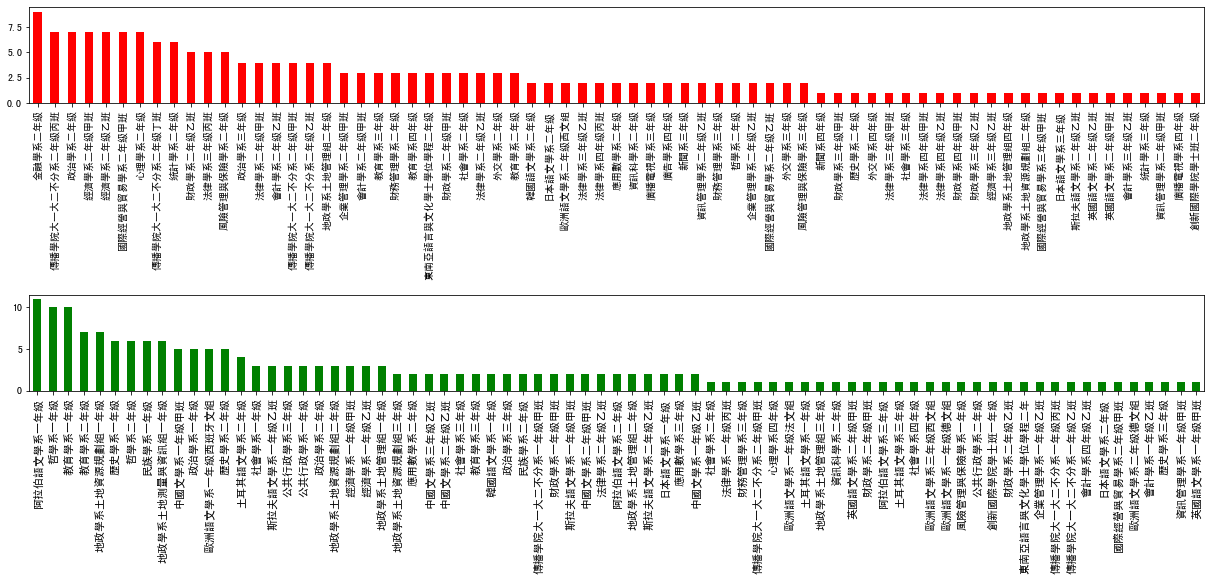

In [24]:
fig, axes = plt.subplots(figsize=(17,6), nrows=2, ncols=1)
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.xticks(rotation=90, fontsize=13)
transfer_110['轉入系級'].value_counts().plot(ax=axes[0], kind='bar', color='r')
fig.tight_layout()
plt.xticks(rotation=90, fontsize=11)
transfer_110['轉出系級'].value_counts().plot(ax=axes[1], kind='bar', color='g')

In [33]:
def preprocess(origin_csv):
    # set columns & create dataframe
    name = ['序號', '學號', '姓名', '轉入系級', '轉出系級']
    transfer_df = pd.DataFrame(columns=name)
    transfer_df = pd.read_csv(origin_csv)
    
    # remove redundant columns
    transfer_df.drop(['序號', '學號', '姓名'], axis=1, inplace=True)
    
    # remove redundant rows
    transfer_df = transfer_df.loc[transfer_df['轉入系級'] != '轉入系級']
    
    # reindex then index is continuous
    transfer_df = transfer_df.reindex(columns=['轉入系級', '轉出系級'])
    
    return transfer_df

In [63]:
def draw_transfer_bar(transfer_df):    
    # draw
    fig, axes = plt.subplots(figsize=(17,6), nrows=2, ncols=1)
    
    # show Chinese words
    plt.rcParams['font.sans-serif'] = ['SimHei']
    
    plt.xticks(rotation=90, fontsize=13)
    transfer_df['轉入系級'].value_counts().plot(ax=axes[0], kind='bar', color='r')
    fig.tight_layout()
    plt.xticks(rotation=90, fontsize=9)
    transfer_df['轉出系級'].value_counts().plot(ax=axes[1], kind='bar', color='g')

In [65]:
tabula.convert_into('transfer_109.pdf', 'transfer_109.csv', output_format = 'csv', pages='all')
tabula.convert_into('transfer_108.pdf', 'transfer_108.csv', output_format = 'csv', pages='all')
tabula.convert_into('transfer_107.pdf', 'transfer_107.csv', output_format = 'csv', pages='all')
tabula.convert_into('transfer_106.pdf', 'transfer_106.csv', output_format = 'csv', pages='all')
transfer_109 = preprocess('transfer_109.csv')
transfer_108 = preprocess('transfer_108.csv')
transfer_107 = preprocess('transfer_107.csv')
transfer_106 = preprocess('transfer_106.csv')

In [46]:
transfer_106_to_110 = pd.concat([transfer_106, transfer_107, transfer_108, transfer_109, transfer_110], axis=0)

In [48]:
# remove redundant rows
transfer_106_to_110 = transfer_106_to_110.loc[transfer_106_to_110['轉入系級'] != '轉入系級']

transfer_106_to_110 = transfer_106_to_110.reindex(columns=['轉入系級', '轉出系級'])

## Mission 1

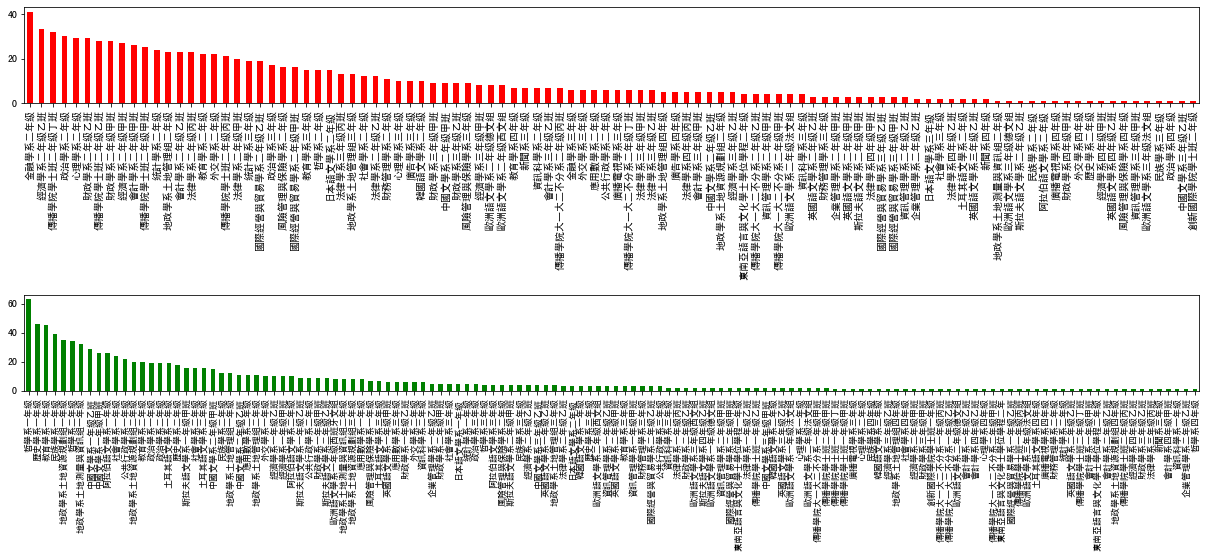

In [64]:
draw_transfer_bar(transfer_106_to_110)

### ---我是分隔線---

計算各科系五年趨勢變化時，同系不同年級合併計算，同系不同組也合併計算（只取前三字）

In [74]:
transfer_110['轉入系級'] = transfer_110['轉入系級'].apply(lambda x:x[:3])

In [75]:
transfer_110['轉入系級']

0      教育學
1      教育學
2      教育學
3      教育學
4      教育學
      ... 
218    心理學
219    心理學
221    資訊科
222    資訊科
224    創新國
Name: 轉入系級, Length: 192, dtype: object

## Group by 轉入系級&轉出系級

In [79]:
transfer_110_in = transfer_110.groupby('轉入系級')

In [97]:
def group_all_majors(transfer_df):
    transfer_df['轉入系級'] = transfer_df['轉入系級'].apply(lambda x:x[:3])
    transfer_df['轉出系級'] = transfer_df['轉出系級'].apply(lambda x:x[:3])
    
    transfer_df_in = transfer_df.drop('轉出系級', axis=1)
    transfer_df_out = transfer_df.drop('轉入系級', axis=1)
    
    transfer_df_in = transfer_df_in.groupby('轉入系級')
    transfer_df_out = transfer_df_out.groupby('轉出系級')
    
    return transfer_df_in, transfer_df_out

In [98]:
transfer_110_in, transfer_110_out = group_all_majors(transfer_110)
transfer_109_in, transfer_109_out = group_all_majors(transfer_109)
transfer_108_in, transfer_108_out = group_all_majors(transfer_108)
transfer_107_in, transfer_107_out = group_all_majors(transfer_107)
transfer_106_in, transfer_106_out = group_all_majors(transfer_106)

In [80]:
# show all majors transfered(in) students
transfer_110_in.size()

轉入系級
企業管     5
傳播學    21
創新國     1
哲學系     2
國際經    10
地政學     6
外交學     6
廣告學     2
廣播電     3
心理學     7
應用數     2
政治學    11
教育學     9
斯拉夫     1
新聞系     3
日本語     3
會計學     8
東南亞     3
歐洲語     2
歷史學     1
法律學    19
社會學     4
統計學     7
經濟學    15
英國語     2
財務管     5
財政學    11
資訊科     2
資訊管     3
金融學     9
韓國語     2
風險管     7
dtype: int64

In [230]:
# show all majors transfered(out) students
transfer_110_out.size()

轉出系級
中國文    13
企業管     1
傳播學     5
公共行     7
創新國     1
哲學系    16
國際經     1
土耳其     6
地政學    24
心理學     1
應用數     4
政治學    10
教育學    19
斯拉夫     7
日本語     3
會計學     2
東南亞     1
歐洲語     9
歷史學    12
民族學     8
法律學     3
社會學     7
經濟學     6
英國語     2
財務管     1
財政學     4
資訊科     1
資訊管     1
阿拉伯    14
韓國語     2
風險管     1
dtype: int64

In [184]:
# show all groups
transfer_106_in.groups

{'中國文': [0, 1, 2, 3, 4, 5], '傳播學': [124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153], '公共行': [41, 42], '哲學系': [7, 8, 9, 10, 11, 12], '國際經': [71, 72, 73, 74, 75, 76, 77, 78], '土耳其': [171, 172], '地政學': [44, 45, 46, 47, 48, 49, 50, 51], '外交學': [209, 210, 211, 212], '廣告學': [119, 120, 121, 122], '心理學': [194, 195, 196, 197, 198, 199, 200, 201], '應用數': [191, 192], '政治學': [14, 15, 16, 17, 18, 19], '教育學': [203, 204, 205, 206, 207], '斯拉夫': [161, 162], '新聞系': [117], '日本語': [164, 165, 166], '會計學': [91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103], '歐洲語': [174, 175, 176], '法律學': [178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189], '社會學': [21, 22], '統計學': [105, 106, 107, 108, 109], '經濟學': [53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69], '英國語': [155, 156, 157], '財務管': [111], '財政學': [24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39], '金融學': [80, 81, 82, 83, 84, 85, 86, 87, 88, 89

In [195]:
# DataFrameGroupBy can't add column
transfer_106_in['AAA'] = ['1']

TypeError: 'DataFrameGroupBy' object does not support item assignment

In [197]:
transfer_106_in.get_group('金融學').size

10

In [212]:
list(transfer_106_out)[0][1]

,轉出系級
24,中國文
30,中國文
31,中國文
61,中國文
67,中國文
119,中國文
120,中國文
124,中國文
125,中國文
126,中國文


In [211]:
len(list(transfer_106_out)[0][1])

18

## Count transfered students each major each year

In [215]:
found = False
target_col = 0

# Packing to list can help find whether the column(major) exists in the groupby.

for i in range(len(list(transfer_106_out))):
    if list(transfer_106_out)[i][0] == '金融學':
        found = True
        target_col = i
        break

if found == False:
    print(0) # if not exist, fill 0 instead
else:
    print(len(list(transfer_106_out)[target_col][1]))

0


In [216]:
def isMajorExist(transfer_df, major_name):
    found = False
    target_col = 0

    for i in range(len(list(transfer_df))):
        if list(transfer_df)[i][0] == major_name:
            found = True
            target_col = i
            break

    if found == False:
        return 0
    else:
        return len(list(transfer_df)[target_col][1])

In [178]:
# each major should generate a dataframe like this(and then concat them(axis=1))
MB_dict = {'金融學': [transfer_106_in.get_group('金融學').size, transfer_107_in.get_group('金融學').size, 
               transfer_108_in.get_group('金融學').size, transfer_109_in.get_group('金融學').size, 
               transfer_110_in.get_group('金融學').size]}
MB = pd.DataFrame(MB_dict, columns=['金融學'], index=range(106, 111, 1))
MB

,金融學
106,10
107,8
108,10
109,10
110,9


In [128]:
type(transfer_106_in)

pandas.core.groupby.generic.DataFrameGroupBy

In [114]:
# one star(tuple) test
def one_star(*fruit):
    print(fruit[1], len(fruit))
    
one_star('apple', 'banana', 'orange')

banana 3


In [221]:
def each_major_trend(oldest_year, major_name, *transfer_df):
    
    students = []
    
    for i in range(len(*transfer_df)):
        students.append(isMajorExist(transfer_df[0][i], major_name)) # count each year students and append in list(as value)
    
    major_dict = {major_name: students}
    
    major = pd.DataFrame(major_dict, columns=[major_name], index=range(oldest_year, oldest_year+len(*transfer_df), 1))
    return major

In [223]:
transfer_in = (transfer_106_in, transfer_107_in, transfer_108_in, transfer_109_in, transfer_110_in)
transfer_out = (transfer_106_out, transfer_107_out, transfer_108_out, transfer_109_out, transfer_110_out)

BA_in, BA_out = each_major_trend(106, '企業管', transfer_in), each_major_trend(106, '企業管', transfer_out)
BA_in

,企業管
106,0
107,0
108,0
109,0
110,5


In [231]:
transfer_in = (transfer_106_in, transfer_107_in, transfer_108_in, transfer_109_in, transfer_110_in)
transfer_out = (transfer_106_out, transfer_107_out, transfer_108_out, transfer_109_out, transfer_110_out)

BA_in, BA_out = each_major_trend(106, '企業管', transfer_in), each_major_trend(106, '企業管', transfer_out)
Comm_in, Comm_out = each_major_trend(106, '傳播學', transfer_in), each_major_trend(106, '傳播學', transfer_out)
ICI_in, ICI_out = each_major_trend(106, '創新國', transfer_in), each_major_trend(106, '創新國', transfer_out)
Phi_in, Phi_out = each_major_trend(106, '哲學系', transfer_in), each_major_trend(106, '哲學系', transfer_out)
IB_in, IB_out = each_major_trend(106, '國際經', transfer_in), each_major_trend(106, '國際經', transfer_out)
LE_in, LE_out = each_major_trend(106, '地政學', transfer_in), each_major_trend(106, '地政學', transfer_out)
Dip_in, Dip_out = each_major_trend(106, '外交學', transfer_in), each_major_trend(106, '外交學', transfer_out)
Adv_in, Adv_out = each_major_trend(106, '廣告學', transfer_in), each_major_trend(106, '廣告學', transfer_out)
RT_in, RT_out = each_major_trend(106, '廣播電', transfer_in), each_major_trend(106, '廣播電', transfer_out)
Psy_in, Psy_out = each_major_trend(106, '心理學', transfer_in), each_major_trend(106, '心理學', transfer_out)
Mat_in, Mat_out = each_major_trend(106, '應用數', transfer_in), each_major_trend(106, '應用數', transfer_out)
Pol_in, Pol_out = each_major_trend(106, '政治學', transfer_in), each_major_trend(106, '政治學', transfer_out)
Edu_in, Edu_out = each_major_trend(106, '教育學', transfer_in), each_major_trend(106, '教育學', transfer_out)
Sla_in, Sla_out = each_major_trend(106, '斯拉夫', transfer_in), each_major_trend(106, '斯拉夫', transfer_out)
Jou_in, Jou_out = each_major_trend(106, '新聞學', transfer_in), each_major_trend(106, '新聞學', transfer_out)
Jap_in, Jap_out = each_major_trend(106, '日本語', transfer_in), each_major_trend(106, '日本語', transfer_out)
Acc_in, Acc_out = each_major_trend(106, '會計學', transfer_in), each_major_trend(106, '會計學', transfer_out)
SEA_in, SEA_out = each_major_trend(106, '東南亞', transfer_in), each_major_trend(106, '東南亞', transfer_out)
Eur_in, Eur_out = each_major_trend(106, '歐洲語', transfer_in), each_major_trend(106, '歐洲語', transfer_out)
His_in, His_out = each_major_trend(106, '歷史學', transfer_in), each_major_trend(106, '歷史學', transfer_out)
Law_in, Law_out = each_major_trend(106, '法律學', transfer_in), each_major_trend(106, '法律學', transfer_out)
Soc_in, Soc_out = each_major_trend(106, '社會學', transfer_in), each_major_trend(106, '社會學', transfer_out)
Sta_in, Sta_out = each_major_trend(106, '統計學', transfer_in), each_major_trend(106, '統計學', transfer_out)
Eco_in, Eco_out = each_major_trend(106, '經濟學', transfer_in), each_major_trend(106, '經濟學', transfer_out)
Eng_in, Eng_out = each_major_trend(106, '英國語', transfer_in), each_major_trend(106, '英國語', transfer_out)
Fin_in, Fin_out = each_major_trend(106, '財務管', transfer_in), each_major_trend(106, '財務管', transfer_out)
PF_in, PF_out = each_major_trend(106, '財政學', transfer_in), each_major_trend(106, '財政學', transfer_out)
CS_in, CS_out = each_major_trend(106, '資訊科', transfer_in), each_major_trend(106, '資訊科', transfer_out)
MIS_in, MIS_out = each_major_trend(106, '資訊管', transfer_in), each_major_trend(106, '資訊管', transfer_out)
MB_in, MB_out = each_major_trend(106, '金融學', transfer_in), each_major_trend(106, '金融學', transfer_out)
Kor_in, Kor_out = each_major_trend(106, '韓國語', transfer_in), each_major_trend(106, '韓國語', transfer_out)
RMI_in, RMI_out = each_major_trend(106, '風險管', transfer_in), each_major_trend(106, '風險管', transfer_out)
PA_in, PA_out = each_major_trend(106, '公共行', transfer_in), each_major_trend(106, '公共行', transfer_out)
Tur_in, Tur_out = each_major_trend(106, '土耳其', transfer_in), each_major_trend(106, '土耳其', transfer_out)
Eth_in, Eth_out = each_major_trend(106, '民族學', transfer_in), each_major_trend(106, '民族學', transfer_out)
Ara_in, Ara_out = each_major_trend(106, '阿拉伯', transfer_in), each_major_trend(106, '阿拉伯', transfer_out)

In [241]:
BA_in.columns[0]+'(in)'

'企業管(in)'

In [286]:
len(BA_in)

5

## Visualize

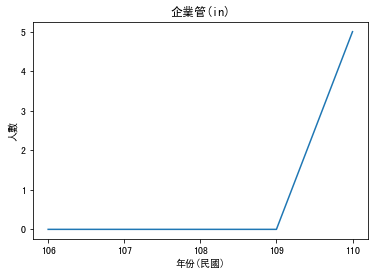

In [242]:
plt.figure(figsize=(6,4))

plt.title(BA_in.columns[0]+'(in)')
plt.xlabel('年份(民國)')
plt.xticks(range(106,111,1))
plt.ylabel('人數')
plt.plot(BA_in)

In [260]:
all_majors_each_year_transfer_in = [BA_in, Comm_in, ICI_in, Phi_in, IB_in, LE_in, Dip_in, Adv_in, RT_in, Psy_in, 
                                   Mat_in, Pol_in, Edu_in, Sla_in, Jou_in, Jap_in, Acc_in, SEA_in, Eur_in, 
                                   His_in, Law_in, Soc_in, Sta_in, Eco_in, Eng_in, Fin_in, PF_in, CS_in, MIS_in, 
                                   MB_in, Kor_in, RMI_in, PA_in, Tur_in, Eth_in, Ara_in]

all_majors_each_year_transfer_out = [BA_out, Comm_out, ICI_out, Phi_out, IB_out, LE_out, Dip_out, Adv_out, RT_out, 
                                     Psy_out, Mat_out, Pol_out, Edu_out, Sla_out, Jou_out, Jap_out, Acc_out, SEA_out, 
                                     Eur_out, His_out, Law_out, Soc_out, Sta_out, Eco_out, Eng_out, Fin_out, PF_out, 
                                     CS_out, MIS_out, MB_out, Kor_out, RMI_out, PA_out, Tur_out, Eth_out, Ara_out]

In [244]:
all_majors_each_year_transfer_in[0].columns[0] + '(in)'

'企業管(in)'

## Mission 2

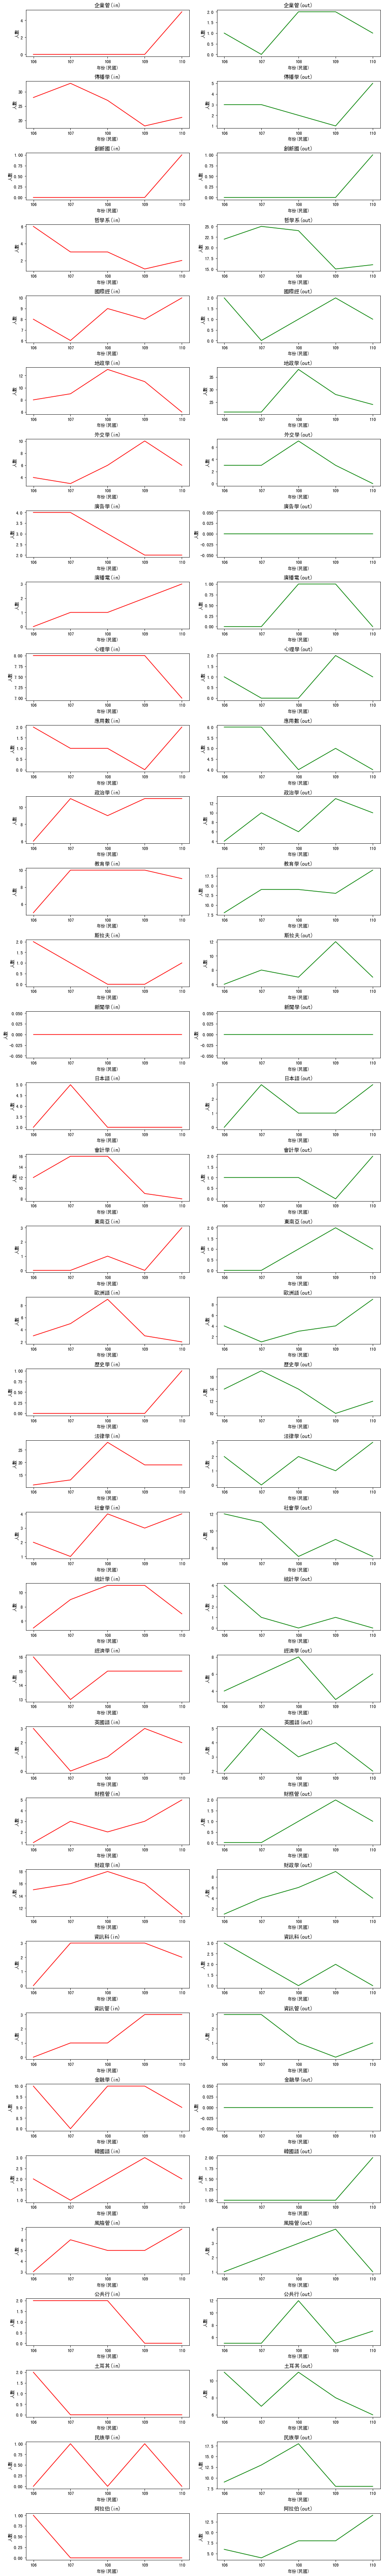

In [261]:
plt.figure(figsize=(12,80))

# show Chinese words
plt.rcParams['font.sans-serif'] = ['SimHei']

for i in range(72):
    plt.subplot(36,2,i+1)
    plt.xlabel('年份(民國)')
    plt.xticks(range(106,111,1))
    plt.ylabel('人數')
    if i % 2 == 0:
        plt.title(all_majors_each_year_transfer_in[int(i/2)].columns[0] + '(in)')
        plt.plot(all_majors_each_year_transfer_in[int(i/2)], color='r')
    else:
        plt.title(all_majors_each_year_transfer_out[int(i/2)].columns[0] + '(out)')
        plt.plot(all_majors_each_year_transfer_out[int(i/2)], color='g')
    plt.tight_layout()

### ---我是分隔線---

## Mission 3

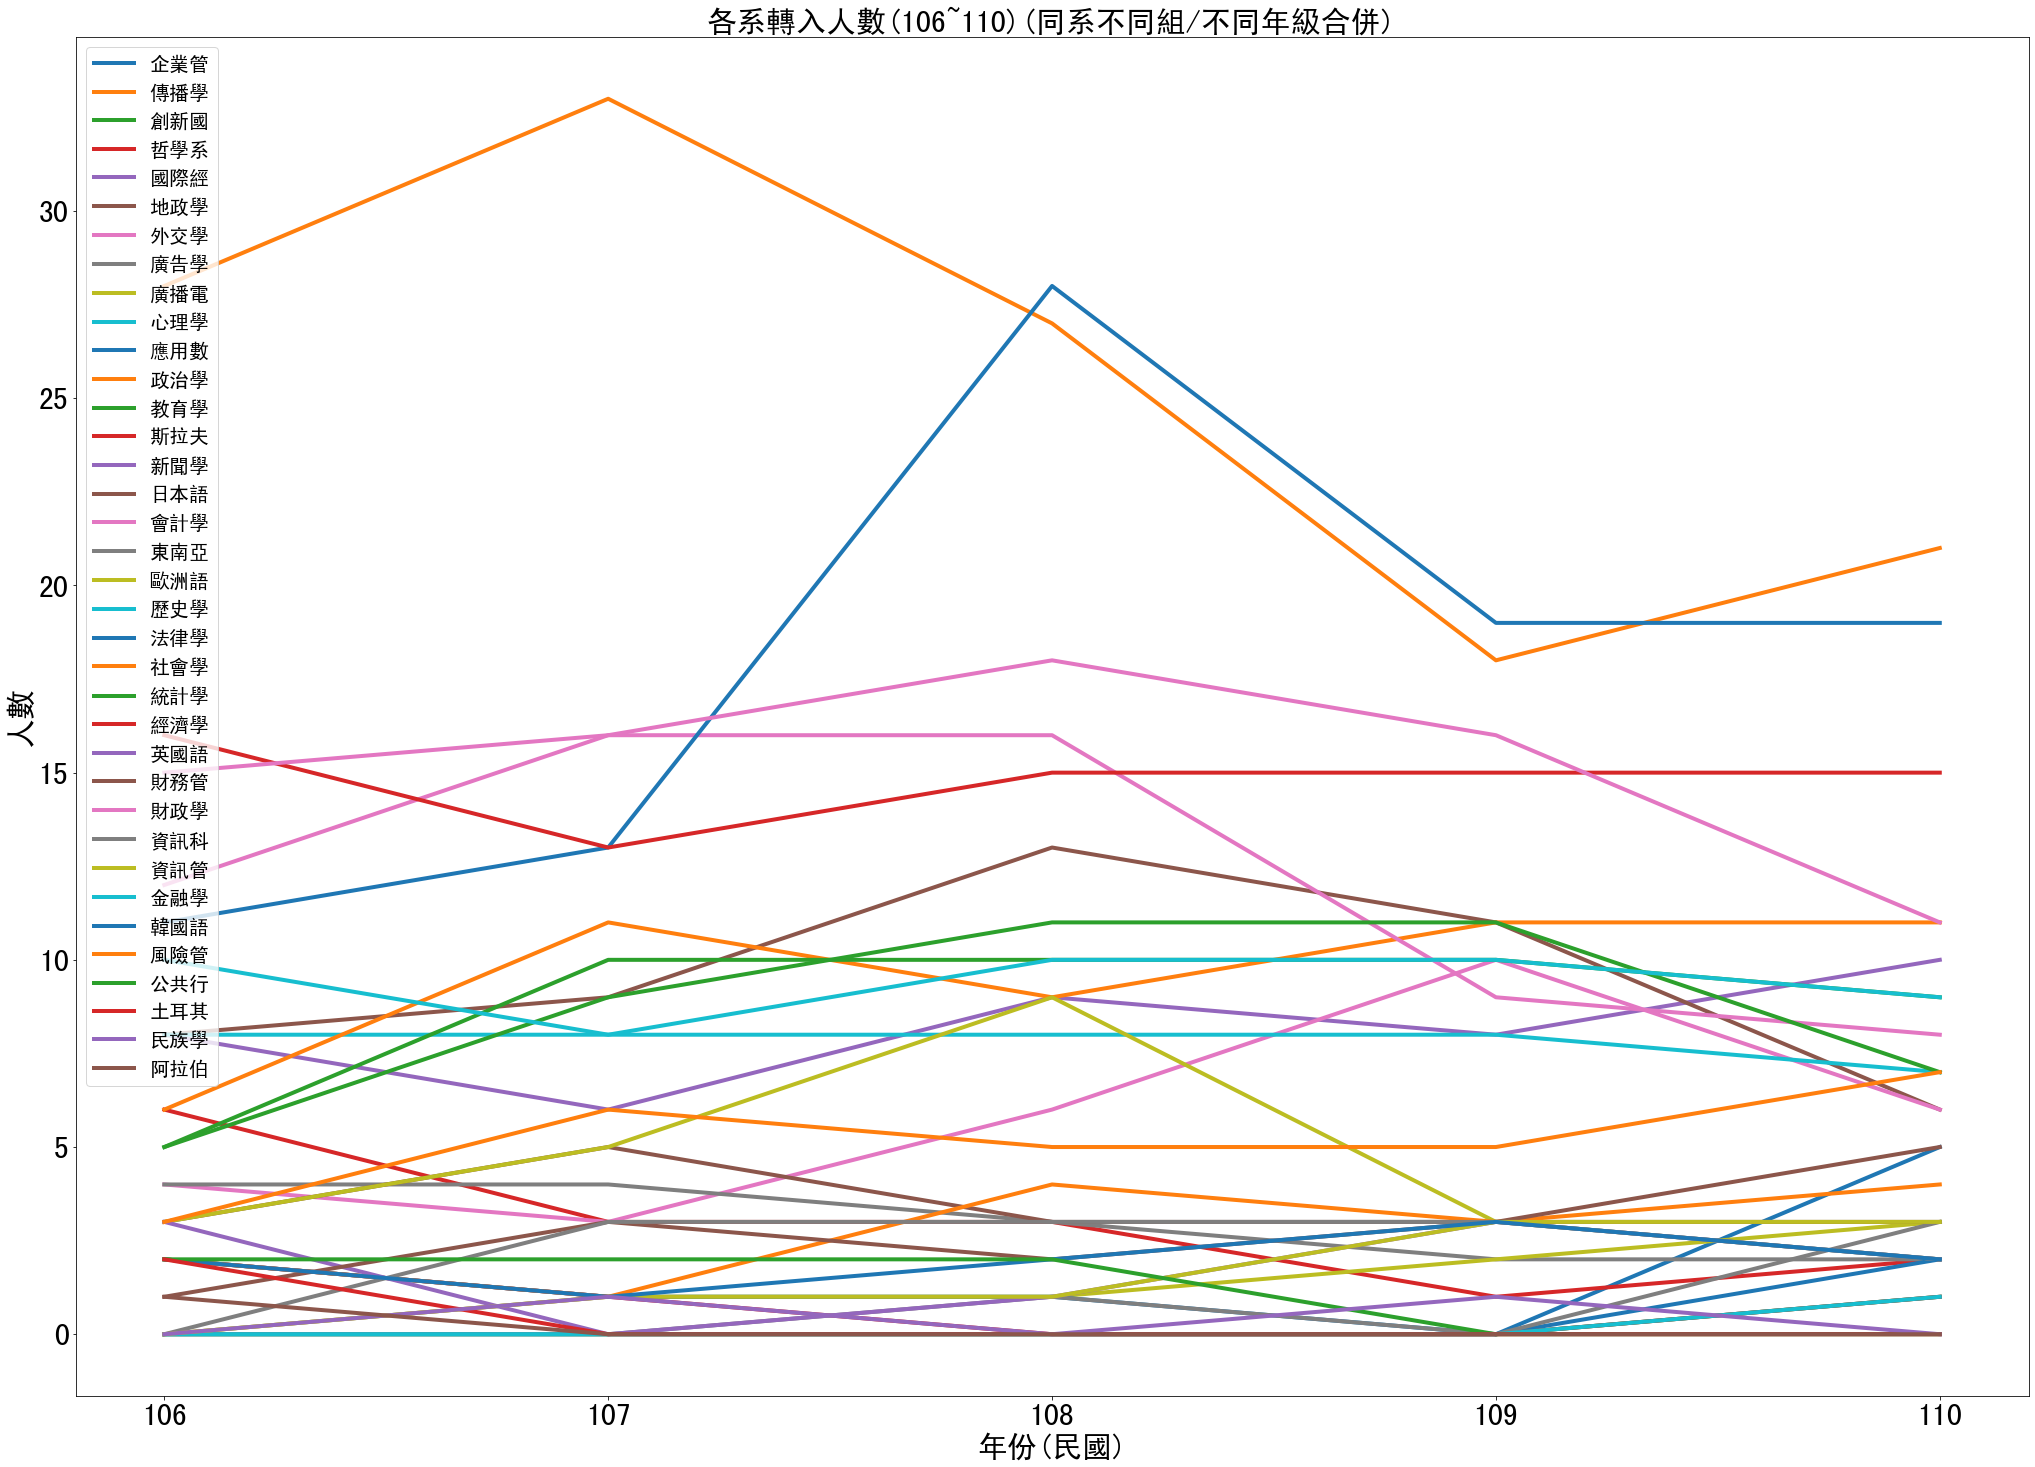

In [299]:
x_range = range(106,111,1)
plt.figure(figsize=(35,25))
plt.xlabel('年份(民國)', fontsize=30)
plt.xticks(x_range, fontsize=30)
plt.ylabel('人數', fontsize=30)
plt.yticks(fontsize=30)
plt.title('各系轉入人數(106~110)(同系不同組/不同年級合併)', fontsize=30)
for i in range(36):
    plt.plot(all_majors_each_year_transfer_in[i], label=all_majors_each_year_transfer_in[i].columns[0], linewidth=4)
    plt.legend(prop={'size': 20})

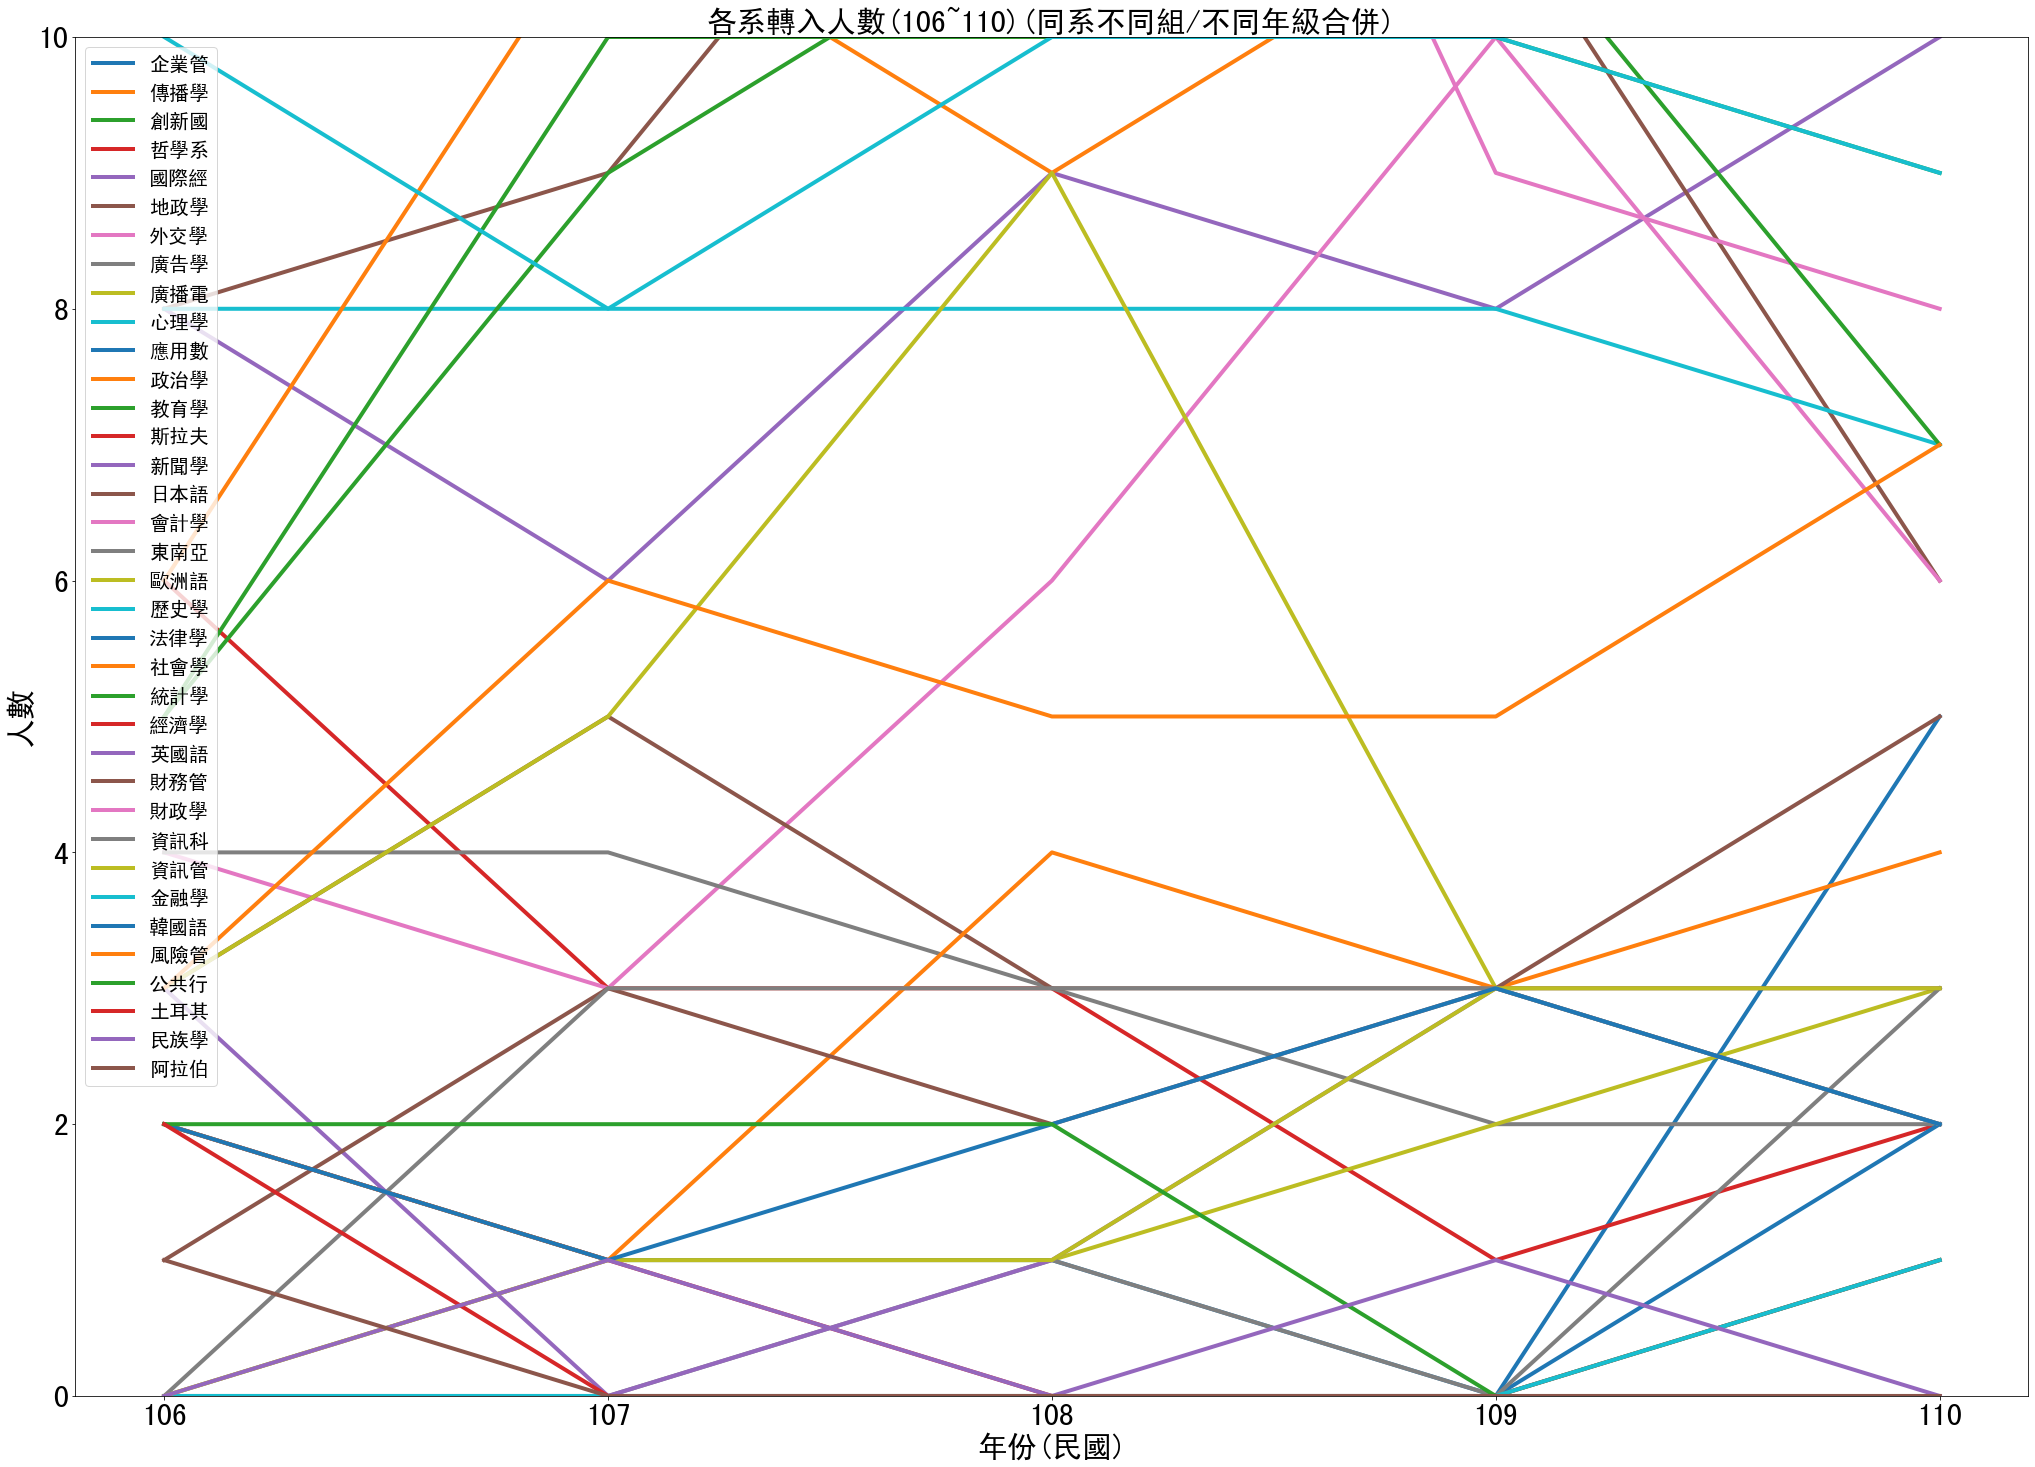

In [300]:
x_range = range(106,111,1)
plt.figure(figsize=(35,25))
plt.xlabel('年份(民國)', fontsize=30)
plt.xticks(x_range, fontsize=30)
plt.ylabel('人數', fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(0,10)
plt.title('各系轉入人數(106~110)(同系不同組/不同年級合併)', fontsize=30)
for i in range(36):
    plt.plot(all_majors_each_year_transfer_in[i], label=all_majors_each_year_transfer_in[i].columns[0], linewidth=4)
    plt.legend(loc=2, prop={'size': 20})

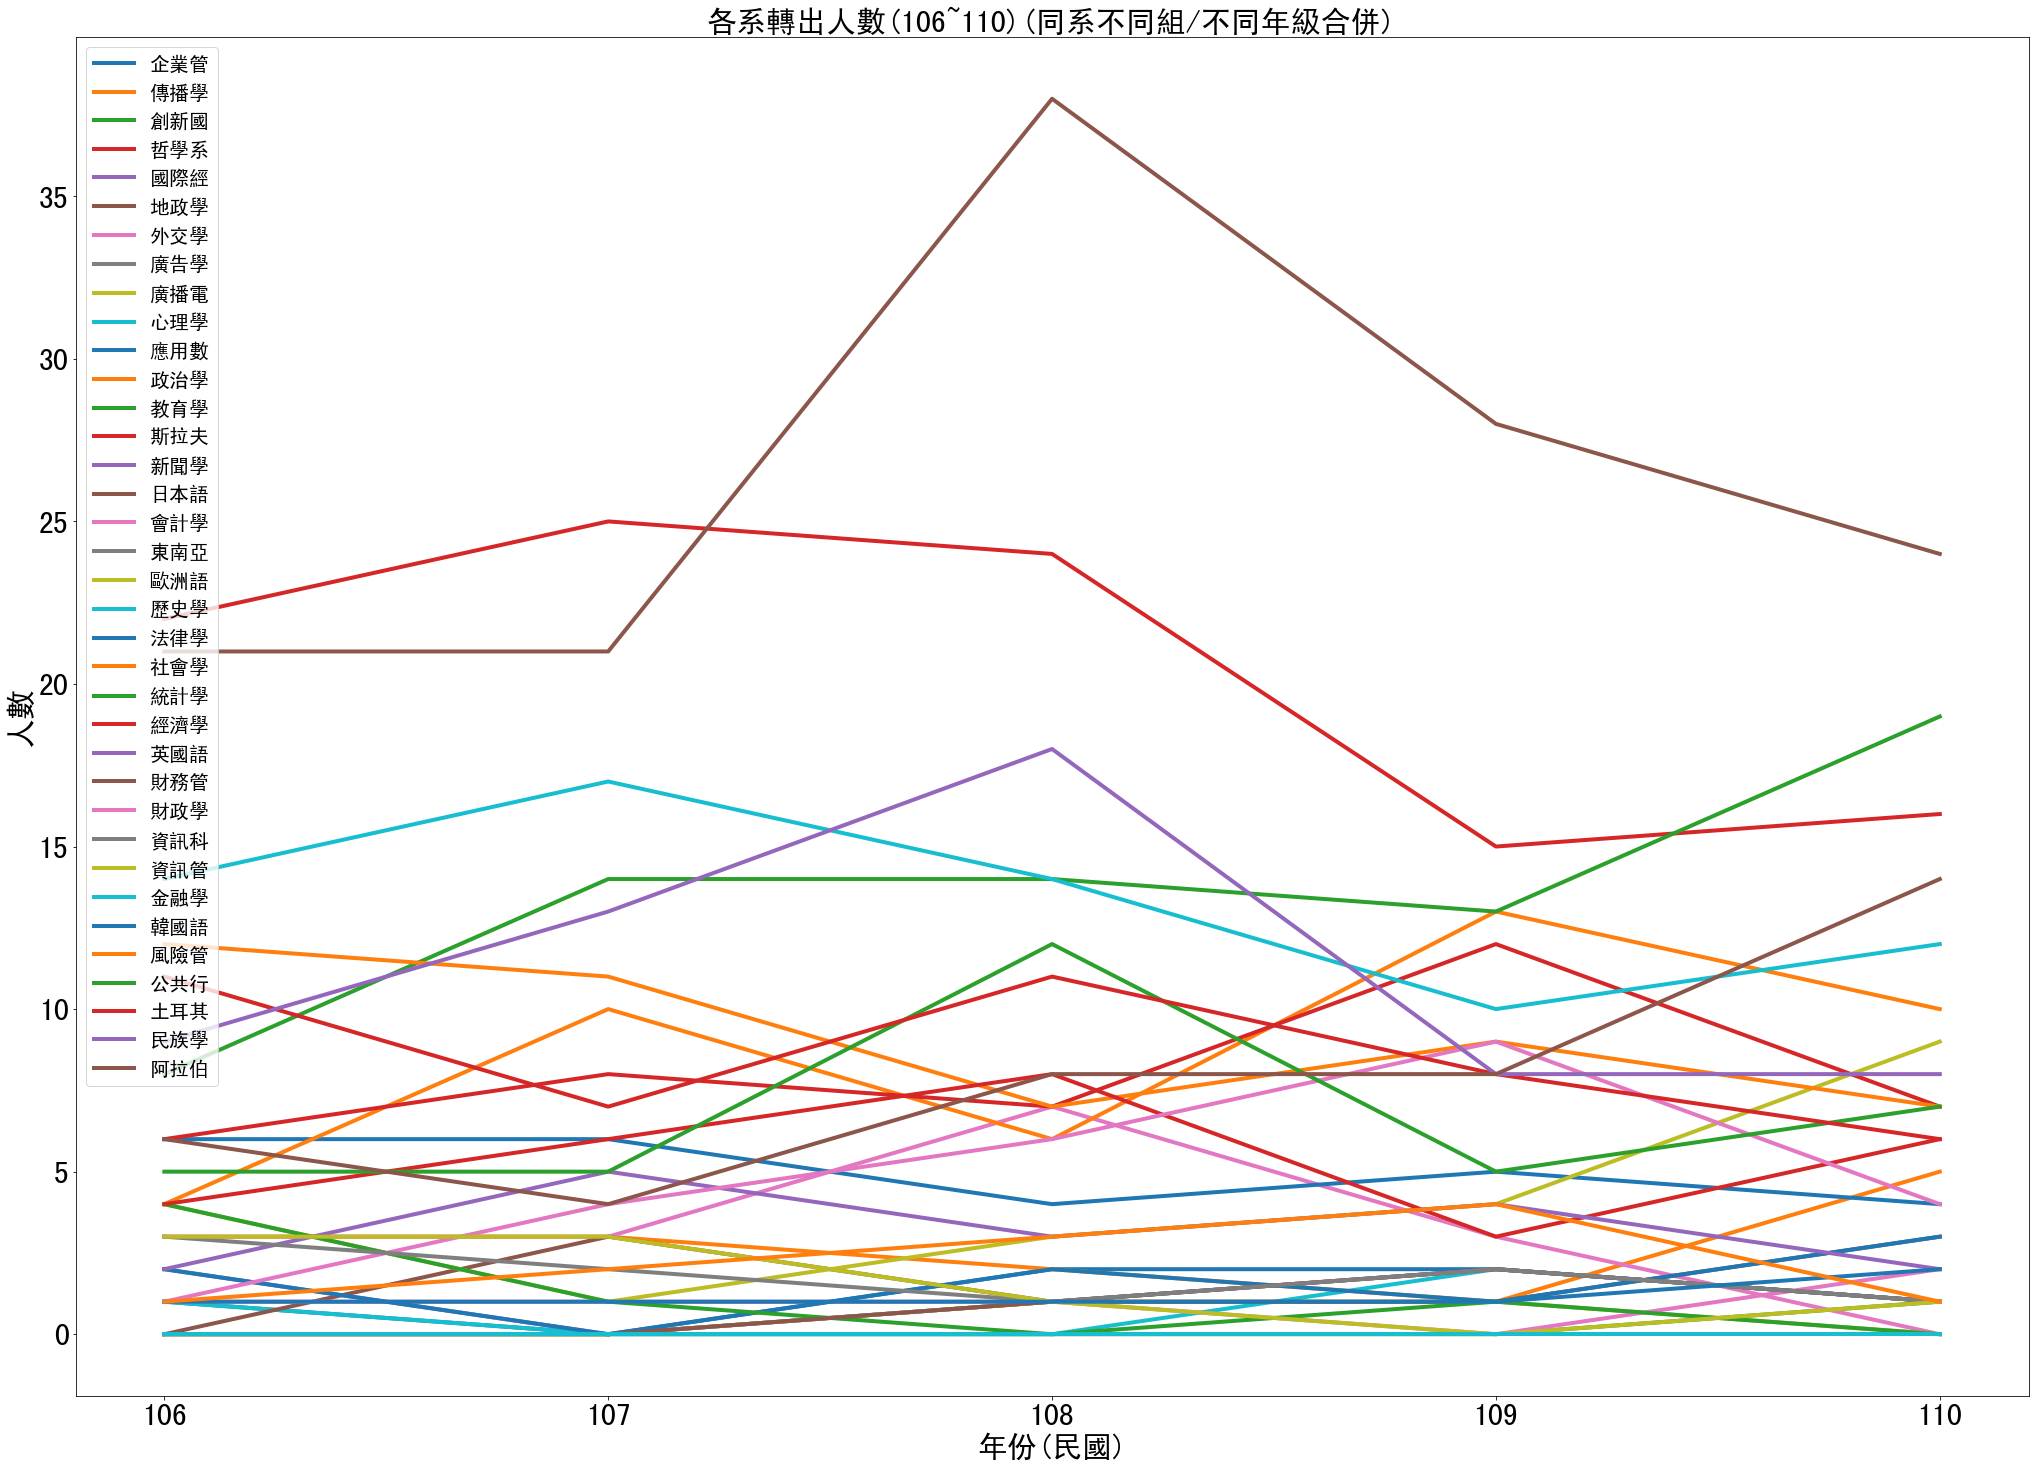

In [301]:
x_range = range(106,111,1)
plt.figure(figsize=(35,25))
plt.xlabel('年份(民國)', fontsize=30)
plt.xticks(x_range, fontsize=30)
plt.ylabel('人數', fontsize=30)
plt.yticks(fontsize=30)
plt.title('各系轉出人數(106~110)(同系不同組/不同年級合併)', fontsize=30)
for i in range(36):
    plt.plot(all_majors_each_year_transfer_out[i], label=all_majors_each_year_transfer_out[i].columns[0], linewidth=4)
    plt.legend(prop={'size': 20})

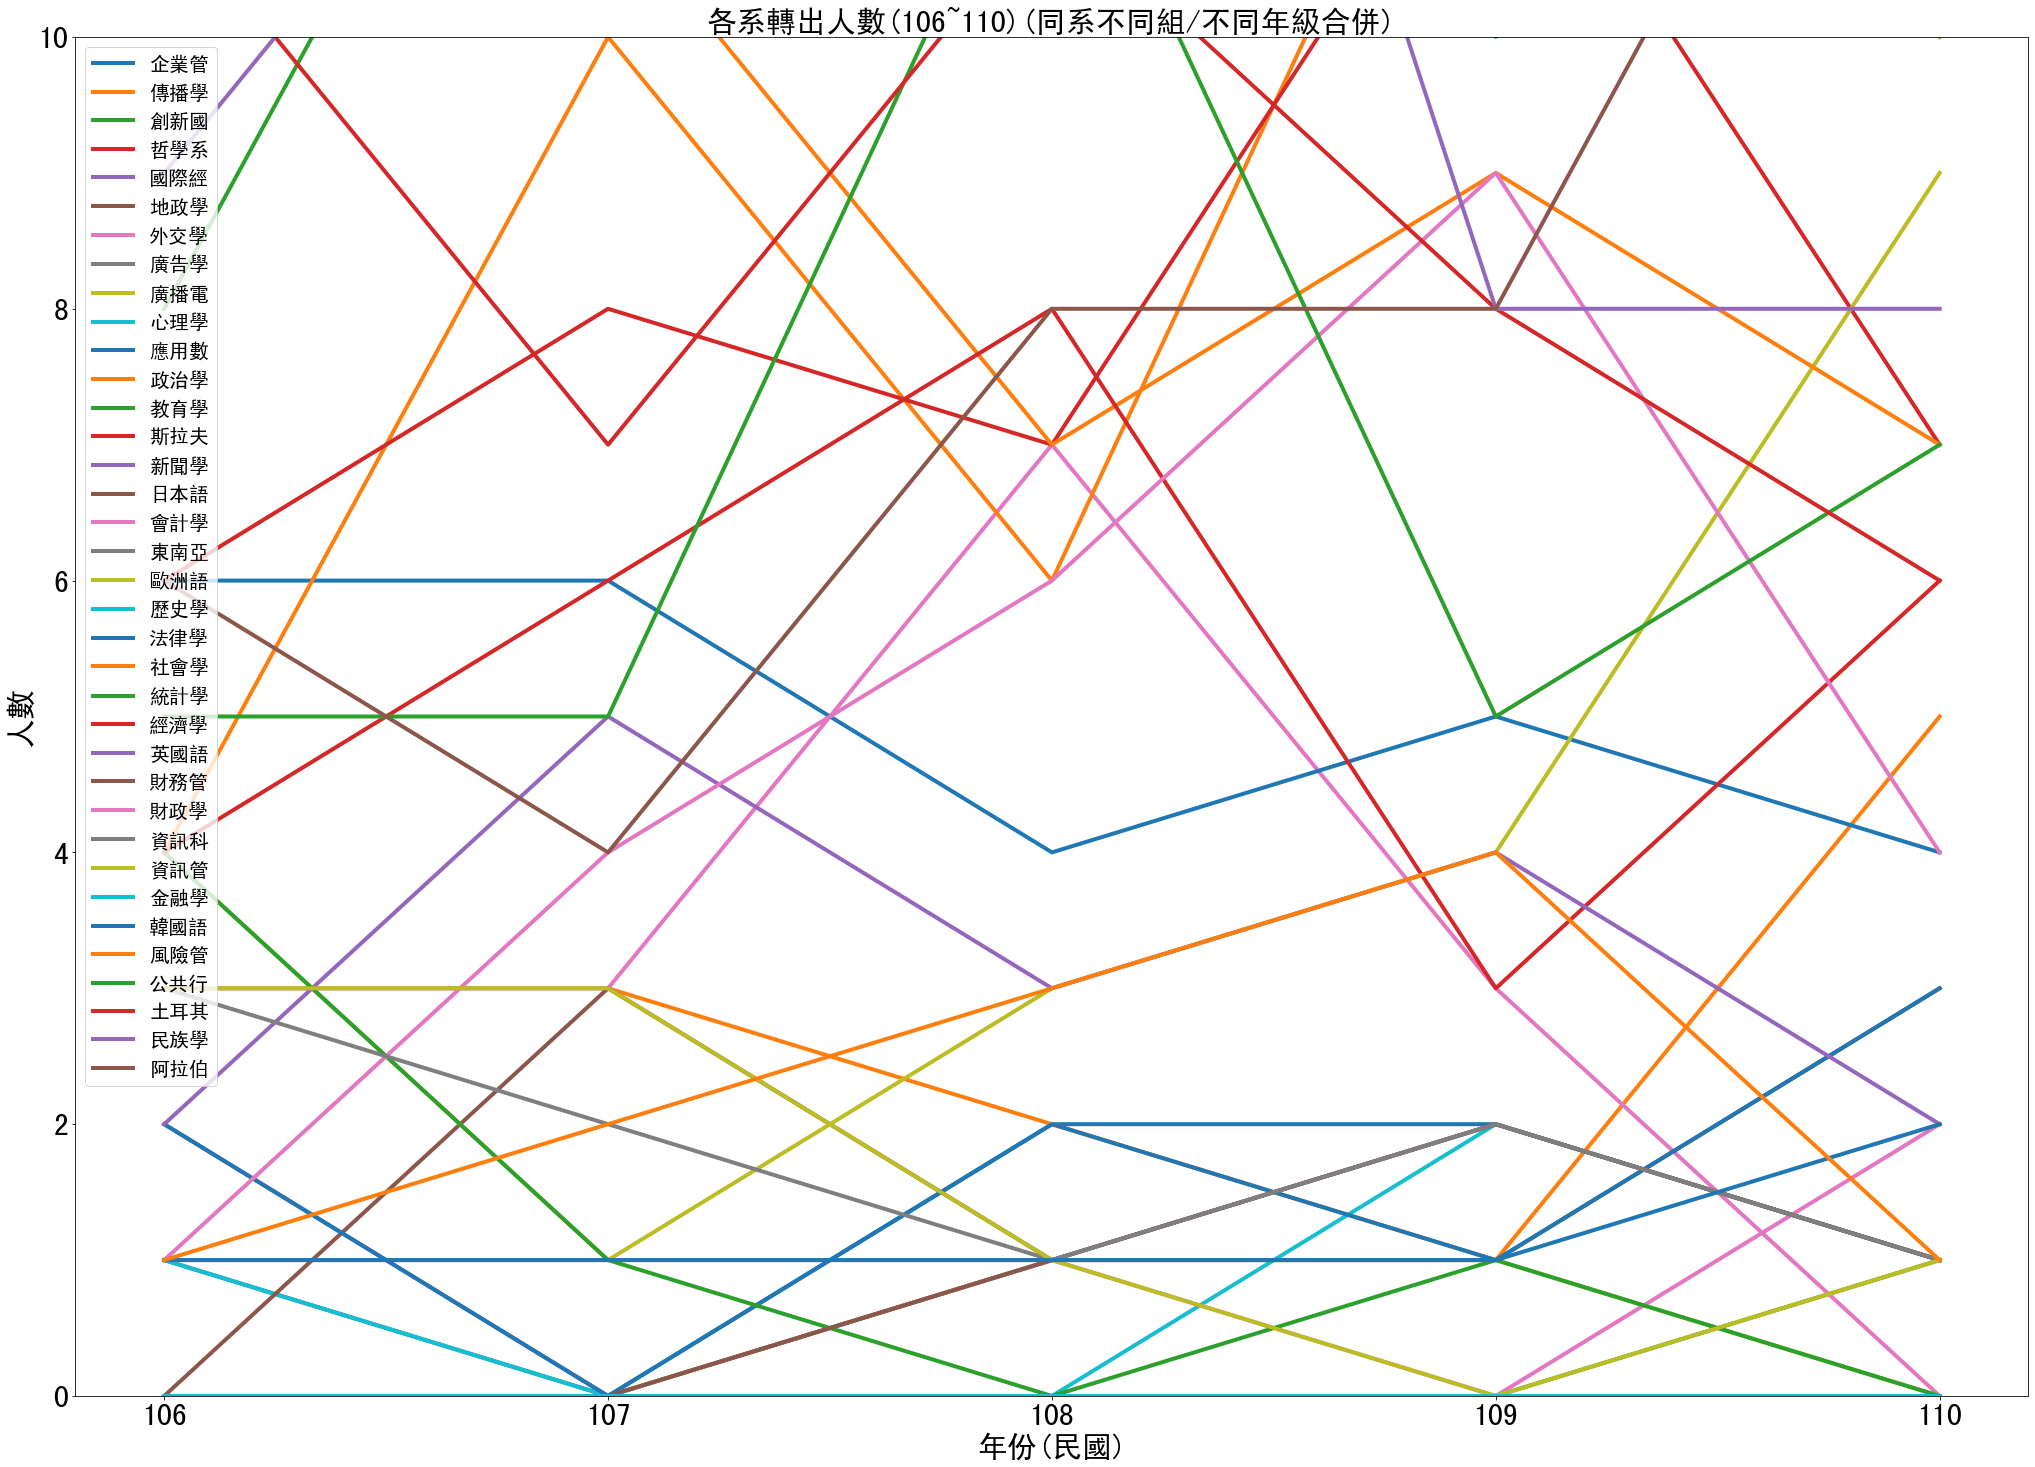

In [302]:
x_range = range(106,111,1)
plt.figure(figsize=(35,25))
plt.xlabel('年份(民國)', fontsize=30)
plt.xticks(x_range, fontsize=30)
plt.ylabel('人數', fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(0,10)
plt.title('各系轉出人數(106~110)(同系不同組/不同年級合併)', fontsize=30)
for i in range(36):
    plt.plot(all_majors_each_year_transfer_out[i], label=all_majors_each_year_transfer_out[i].columns[0], linewidth=4)
    plt.legend(loc=2, prop={'size': 20})